In [34]:
### Getting Started ###

import requests
cereal_csv = requests.get("https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cereal.csv").text

# Example Code
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import pandas as pd
pd.set_option('max_columns', None)

PROTEIN_INDEX = 4
FAT_INDEX = 5
CARB_INDEX = 8

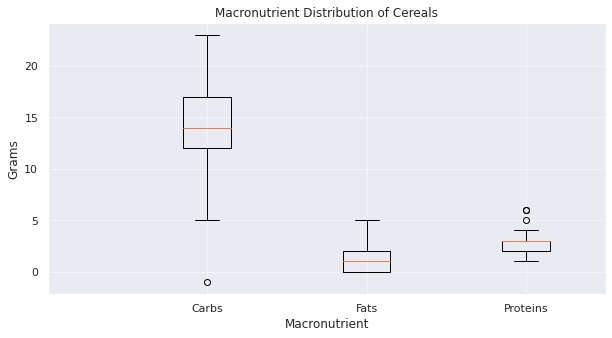

In [35]:
#############################---Exercise 1 Start---###################################
'''
  Carbs, fats and proteins are the three primary macro nutrients. Create a figure plotting the 
  distribution of each of these macro nutrients together (ie, three distributions on a single plot). 
  Make sure to provide a legend.
'''

cereal_data = cereal_csv.splitlines()
cereal_data = [i.split(',') for i in cereal_data]

for row in cereal_data[1:]:
    for i in range(len(row)):
        if i >= 3:
            row[i] = float(row[i])

carbs = []
fats = []
proteins = []

for row in cereal_data[1:]:
  carbs.append(row[CARB_INDEX])
  fats.append(row[FAT_INDEX])
  proteins.append(row[PROTEIN_INDEX])

columns = [carbs, fats, proteins]

fig, ax = plt.subplots()
ax.boxplot(columns)

fig.set_figwidth(10)
fig.set_figheight(5)

plt.suptitle('')
plt.title('Macronutrient Distribution of Cereals')
plt.xlabel('Macronutrient')
plt.xticks(np.arange(4), ['', 'Carbs', 'Fats', 'Proteins'])  # Set text labels.
plt.ylabel('Grams')
plt.yticks(np.arange(0, 25, 5))
plt.grid(linewidth=.5)
plt.show()


######################################################################################

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


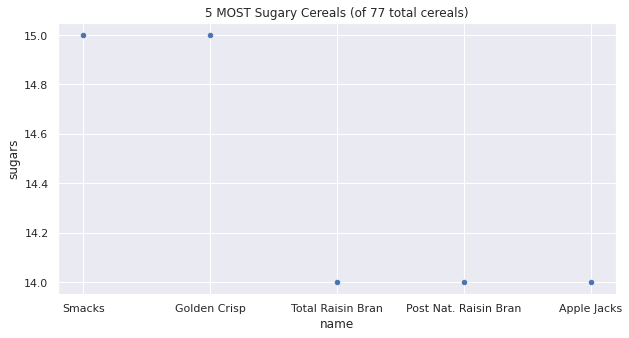

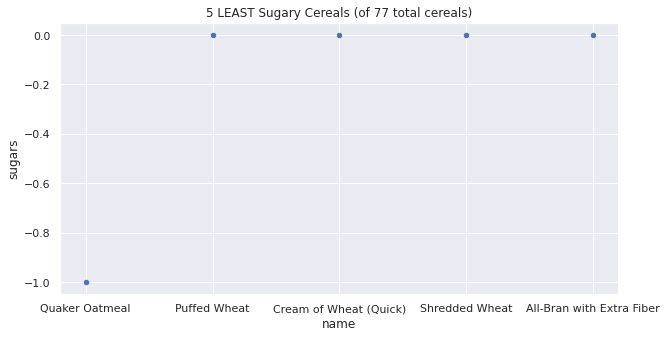

In [36]:
#############################---Exercise 2 Start---###################################
'''
  Get a list of the top 5 most sugary cereals and the 5 least sugary cereals.
'''

df = pd.DataFrame.from_records(cereal_data[1:],columns=cereal_data[0])

# Print the top 5 highest rated cereals
top5 = df.sort_values(by='sugars', ascending=False).head(5)
top5 = top5[['name', 'sugars']]
ax.tick_params(axis='both', which='major', labelsize=10)
top5.plot.scatter(figsize=(10,5), title="5 MOST Sugary Cereals (of 77 total cereals)", x='name', y='sugars')

# Print the bottom 5 highest rated cereals
bottom5 = df.sort_values(by='sugars', ascending=True).head(5)
bottom5 = bottom5[['name', 'sugars']]
bottom5.plot.scatter(figsize=(10,5), title="5 LEAST Sugary Cereals (of 77 total cereals)", x='name', y='sugars')

######################################################################################

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


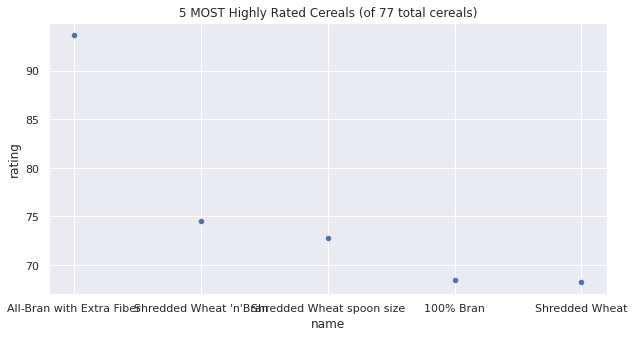

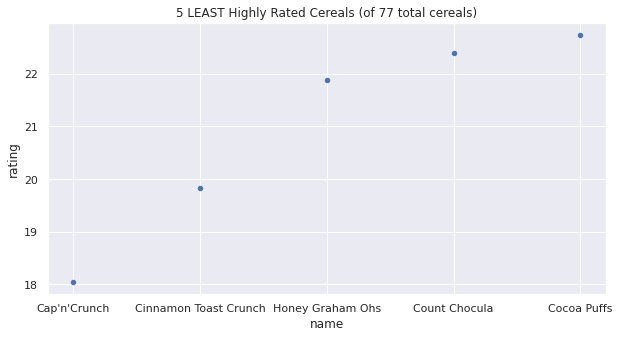

In [37]:
#############################---Exercise 3 Start---###################################
'''
  Get a list of the top 5 highest rated and lowest rated cereals
'''

df = pd.DataFrame.from_records(cereal_data[1:],columns=cereal_data[0])

# Print the top 5 rated cereals
top5 = df.sort_values(by='rating', ascending=False).head(5)
top5 = top5[['name', 'rating']]
top5.plot.scatter(figsize=(10,5), title="5 MOST Highly Rated Cereals (of 77 total cereals)", x='name', y='rating')

# Print the bottom 5 rated cereals
bottom5 = df.sort_values(by='rating', ascending=True).head(5)
bottom5 = bottom5[['name', 'rating']]
bottom5.plot.scatter(figsize=(10,5), title="5 LEAST Highly Rated Cereals (of 77 total cereals)", x='name', y='rating')

######################################################################################

1) Relationship between sugar and ratings: y=-2.4x+59.3. I quantify this as a linear relationship
2) A plot
3) Calculate a statistic between sugar and ratings? My statistic is: 
 2 of the top 5 highest rated cereals are also in the top 5 of lowest sugar cereals.
 I interpret this statistic to mean that lower sugar cereal is also higher rated cereal. The lower the sugar content the greater the opportunity for it to be higher rated.
 However, the highest sugar content cereals are not the lowest rated cereals.


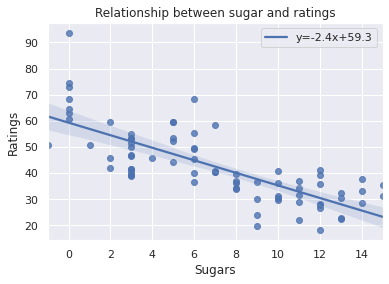

In [41]:
#############################---Exercise 4 Start---###################################
'''
  Quantify the relationship between sugar and ratings. 
  Make a plot to visualize this relationship. Superimpose a best fit line (with seaborn) to describe the relationship (seaborn.regplot — seaborn 0.11.2 documentation )
  Calculate a statistic describing the relationship between sugar and ratings  (i.e., correlation). Write a statement in plain English interpreting this statistic. 
'''

import seaborn as sns; sns.set_theme(color_codes=True)

df = pd.DataFrame.from_records(cereal_data[1:],columns=cereal_data[0])
sugars = np.array(df[['sugars']])
ratings = np.array(df[['rating']])


### Quantify the relationship between sugar and ratings ###
print("1) Relationship between sugar and ratings: y={0:.1f}x+{1:.1f}".format(slope,intercept) +". I quantify this as a linear relationship")

from scipy import stats
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(sugars[:,0], ratings[:,0])

###   Make a plot to visualize this relationship. Superimpose a best fit line (with seaborn) to describe the relationship ###
# use line_kws to set line label for legend
ax = sns.regplot(x=sugars, y=ratings, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set_title("Relationship between sugar and ratings")

# plot legend
ax.legend()
ax.set(xlabel='Sugars', ylabel='Ratings')
print("2) A plot")
ax.plot()

print("3) Calculate a statistic between sugar and ratings? My statistic is: \n 2 of the top 5 highest rated cereals are also in the top 5 of lowest sugar cereals.")
print(" I interpret this statistic to mean that lower sugar cereal is also higher rated cereal. The lower the sugar content the greater the opportunity for it to be higher rated.")
print(" However, the highest sugar content cereals are not the lowest rated cereals.")

######################################################################################

In [46]:
#############################---Exercise 5 Start---###################################
'''
  Of the variables carbo, sugars, calories, protein, and fat which has the strongest relationship with rating? Justify your answer.
'''
corrDf = df[['carbo', 'sugars', 'calories', 'protein', 'fat', 'rating']]
corr = corrDf.corr()
print("Here is a correlation matrix")
print()
print(corr)
print()
print("As you can see, sugars has the strongest relationship with rating because its correlation coefficient is -0.759675.")
print("The closer a correlation coefficient is to either -1 or 1, the stronger the relationship.")


######################################################################################

Here is a correlation matrix

             carbo    sugars  calories   protein       fat    rating
carbo     1.000000 -0.331665  0.250681 -0.130864 -0.318043  0.052055
sugars   -0.331665  1.000000  0.562340 -0.329142  0.270819 -0.759675
calories  0.250681  0.562340  1.000000  0.019066  0.498610 -0.689376
protein  -0.130864 -0.329142  0.019066  1.000000  0.208431  0.470618
fat      -0.318043  0.270819  0.498610  0.208431  1.000000 -0.409284
rating    0.052055 -0.759675 -0.689376  0.470618 -0.409284  1.000000

As you can see, sugars has the strongest relationship with rating because its correlation coefficient is -0.759675.
The closer a correlation coefficient is to either -1 or 1, the stronger the relationship.


In [48]:
#############################---Exercise 6 Start---###################################
'''
  Of the variables carbo, sugars, protein, and fat which has the strongest relationship with rating calories? Justify your answer.
'''
corrDf = df[['carbo', 'sugars', 'protein', 'fat', 'calories']]
corr = corrDf.corr()
print("Here is a correlation matrix")
print()
print(corr)
print()
print("As you can see, sugars has the strongest relationship with calories because its correlation coefficient is 0.562340")
print("However, fat is not too far behind with a correlation coeficient of 0.498610.")
print("The closer a correlation coefficient is to either -1 or 1, the stronger the relationship.")
######################################################################################

Here is a correlation matrix

             carbo    sugars   protein       fat  calories
carbo     1.000000 -0.331665 -0.130864 -0.318043  0.250681
sugars   -0.331665  1.000000 -0.329142  0.270819  0.562340
protein  -0.130864 -0.329142  1.000000  0.208431  0.019066
fat      -0.318043  0.270819  0.208431  1.000000  0.498610
calories  0.250681  0.562340  0.019066  0.498610  1.000000

As you can see, sugars has the strongest relationship with calories because its correlation coefficient is 0.562340
However, fat is not too far behind with a correlation coeficient of 0.498610.
The closer a correlation coefficient is to either -1 or 1, the stronger the relationship.


In [56]:
#############################---Exercise 6 Start---###################################
'''
  The type column has two values: H='hot' and C='cold'. What is the average rating by type?
'''
types = np.array(df[['type']])
ratings = np.array(df[['rating']])

sumHotRating = 0
hotCount = 0
sumColdRating = 0
coldCount = 0

for i in range(len(types)):
  tempType = types[i]
  tempRating = ratings[i]
  if tempType == 'H':
    sumHotRating += float(tempRating)
    hotCount += 1
  elif tempType == 'C':
    sumColdRating += float(tempRating)
    coldCount += 1

print("Average rating by hot type: " + str(sumHotRating / hotCount))
print("Average rating by cold type: " + str(sumColdRating / coldCount))
######################################################################################

Average rating by hot type: 56.73770833333334
Average rating by cold type: 42.095218364864856


One more additional insight. Here is the relationship between protein and ratings: y=6.0x+27.3
Here is a figure of the relationship between protein and ratings. The higher the protein content, the higher the cereal rating is.
I don't know how these ratings are determined. But I do know that higher levels of protein are associated with greater satiety.
I believe that due to the higher protein content of some cereals, consumers will feel more full throughout the day which may contribute to higher cereal ratings.


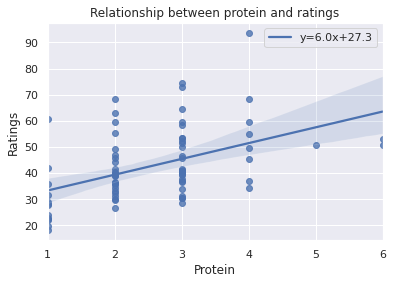

In [58]:
#############################---Exercise 6 Start---###################################
'''
  Provide one additional insight from this dataset that you found interesting. Create at least one figure and explain why the insight was interesting to you.
'''
import seaborn as sns; sns.set_theme(color_codes=True)
df = pd.DataFrame.from_records(cereal_data[1:],columns=cereal_data[0])
proteins = np.array(df[['protein']])
ratings = np.array(df[['rating']])

### Quantify the relationship between protein and ratings ###
print("One more additional insight. Here is the relationship between protein and ratings: y={0:.1f}x+{1:.1f}".format(slope,intercept))

from scipy import stats
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(proteins[:,0], ratings[:,0])

###   Make a plot to visualize this relationship. Superimpose a best fit line (with seaborn) to describe the relationship ###
# use line_kws to set line label for legend
ax = sns.regplot(x=proteins, y=ratings, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.set_title("Relationship between protein and ratings")

# plot legend
ax.legend()
ax.set(xlabel='Protein', ylabel='Ratings')
ax.plot()

print("Here is a figure of the relationship between protein and ratings. The higher the protein content, the higher the cereal rating is.")
print("I don't know how these ratings are determined. But I do know that higher levels of protein are associated with greater satiety.")
print("I believe that due to the higher protein content of some cereals, consumers will feel more full throughout the day which may contribute to higher cereal ratings.")
######################################################################################